   ScaledFeatureA  ScaledFeatureB
0        0.371735        0.182609
1        0.950755        0.540740
2        0.730954        0.873049
3        0.596960        0.731791
4        0.152134        0.806411


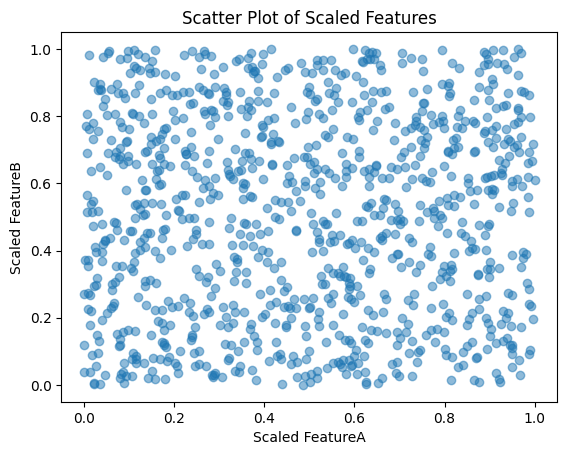

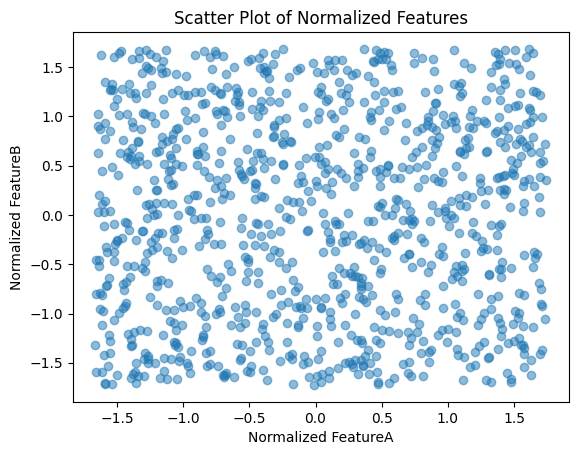

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# Set seed for reproducibility
np.random.seed(42)

# Define the number of data points
num_data_points = 1000

# Generate synthetic data for FeatureA and FeatureB
featureA = np.random.uniform(0, 1000, num_data_points)
featureB = np.random.uniform(0, 10, num_data_points)

# Create a pandas DataFrame
synthetic_dataset = pd.DataFrame({'featureA': featureA, 'featureB': featureB})

# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(synthetic_dataset)

# Create a new DataFrame with the scaled data
scaled_dataset = pd.DataFrame(scaled_data, columns=['ScaledFeatureA', 'ScaledFeatureB'])

print(scaled_dataset.head())

plt.scatter(scaled_dataset['ScaledFeatureA'], scaled_dataset['ScaledFeatureB'], alpha=0.5)
plt.title('Scatter Plot of Scaled Features')
plt.xlabel('Scaled FeatureA')
plt.ylabel('Scaled FeatureB')
plt.show()

# Apply Z-score normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(synthetic_dataset)

normalized_dataset = pd.DataFrame(normalized_data, columns=['NormalizedFeatureA', 'NormalizedFeatureB'])

plt.scatter(normalized_dataset['NormalizedFeatureA'], normalized_dataset['NormalizedFeatureB'], alpha=0.5)
plt.title('Scatter Plot of Normalized Features')
plt.xlabel('Normalized FeatureA')
plt.ylabel('Normalized FeatureB')
plt.show()


In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate simulated dataset
num_samples = 1000
mean_feature_x, std_dev_feature_x = 50, 10
mean_feature_y, std_dev_feature_y = 500, 100

feature_x = np.random.normal(loc=mean_feature_x, scale=std_dev_feature_x, size=num_samples)
feature_y = np.random.normal(loc=mean_feature_y, scale=std_dev_feature_y, size=num_samples)

# Combine features into a 2D array
simulated_data = np.column_stack((feature_x, feature_y))

# Apply Z-score normalization using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(simulated_data)

# Display the first few rows of the normalized dataset
print("Simulated Data:")
print(simulated_data[:5, :])

print("\nNormalized Data:")
print(normalized_data[:5, :])

Simulated Data:
[[ 54.96714153 639.93554366]
 [ 48.61735699 592.46336829]
 [ 56.47688538 505.96303699]
 [ 65.23029856 435.30632223]
 [ 47.65846625 569.82233136]]

Normalized Data:
[[ 0.48775857  1.33257619]
 [-0.1610219   0.85640475]
 [ 0.64201457 -0.01124009]
 [ 1.53638248 -0.71996493]
 [-0.25899524  0.62930297]]


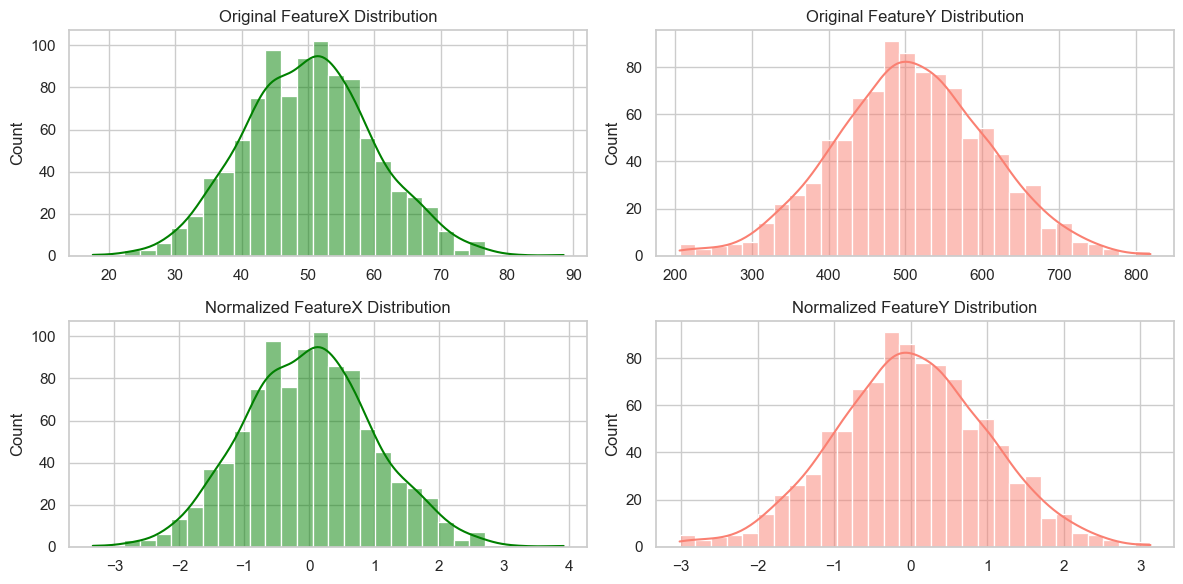

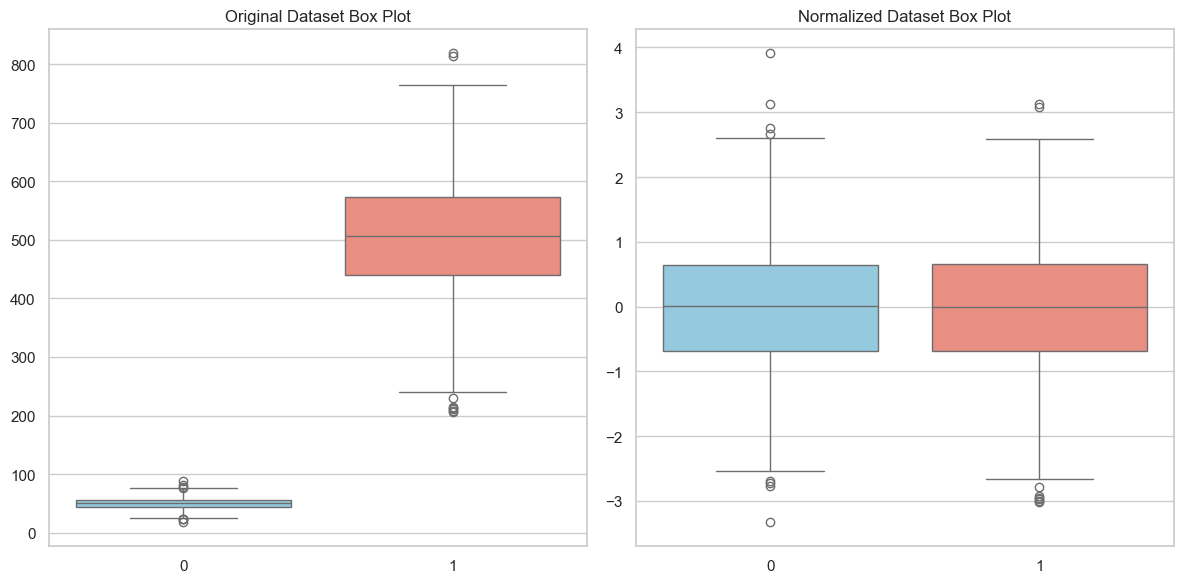

In [4]:
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Plot histograms for the original dataset
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(feature_x, bins=30, kde=True, color='green')
plt.title('Original FeatureX Distribution')

plt.subplot(2, 2, 2)
sns.histplot(feature_y, bins=30, kde=True, color='salmon')
plt.title('Original FeatureY Distribution')

# Plot histograms for the normalized dataset
plt.subplot(2, 2, 3)
sns.histplot(normalized_data[:, 0], bins=30, kde=True, color='green')
plt.title('Normalized FeatureX Distribution')

plt.subplot(2, 2, 4)
sns.histplot(normalized_data[:, 1], bins=30, kde=True, color='salmon')
plt.title('Normalized FeatureY Distribution')

plt.tight_layout()
plt.show()

# Box plots for the original and normalized datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=simulated_data, palette=['skyblue', 'salmon'])
plt.title('Original Dataset Box Plot')

plt.subplot(1, 2, 2)
sns.boxplot(data=normalized_data, palette=['skyblue', 'salmon'])
plt.title('Normalized Dataset Box Plot')

plt.tight_layout()
plt.show()


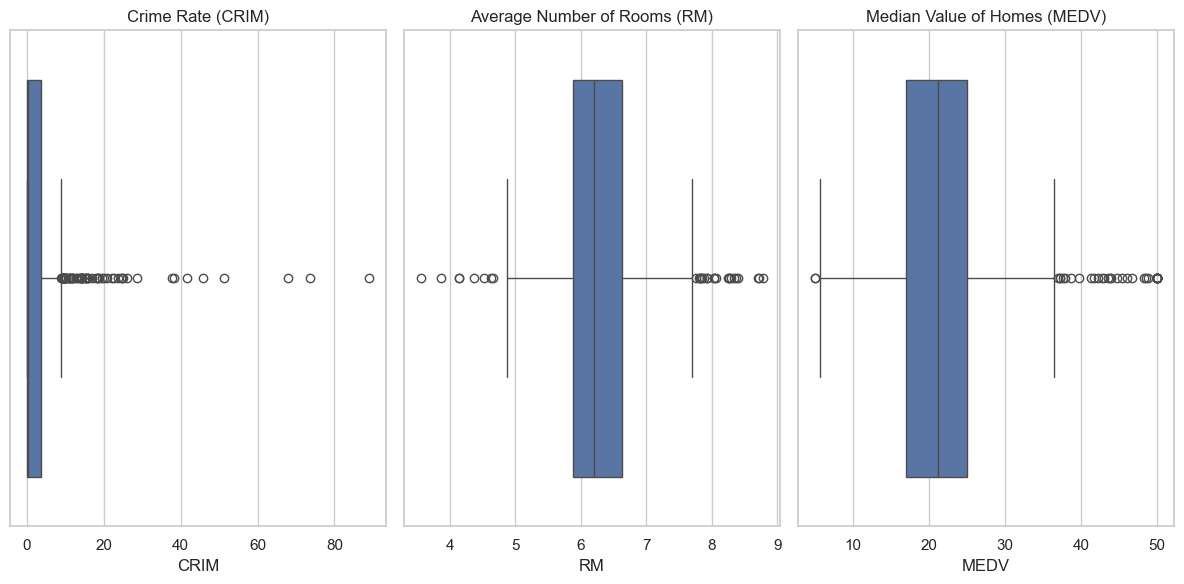

In [5]:
df = pd.read_csv('HousingData.csv')

subset_df = df[['CRIM', 'RM', 'MEDV']]

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='CRIM', data=subset_df)
plt.title('Crime Rate (CRIM)')

plt.subplot(1, 3, 2)
sns.boxplot(x='RM', data=subset_df)
plt.title('Average Number of Rooms (RM)')

plt.subplot(1, 3, 3)
sns.boxplot(x='MEDV', data=subset_df)
plt.title('Median Value of Homes (MEDV)')

plt.tight_layout()
plt.show()

In [6]:
from scipy.stats import zscore

# Create a subset of the DataFrame with the specified columns
subset_df = df[['CRIM', 'RM', 'MEDV']]

# Calculate Z-scores for each feature
z_scores = zscore(subset_df)

# Create a DataFrame with Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=['Z_CRIM', 'Z_RM', 'Z_MEDV'])

# Identify data points with Z-scores higher than 3 or lower than -3
outliers = z_scores_df[(z_scores_df['Z_CRIM'] > 3) | (z_scores_df['Z_CRIM'] < -3) |
                       (z_scores_df['Z_RM'] > 3) | (z_scores_df['Z_RM'] < -3) |
                       (z_scores_df['Z_MEDV'] > 3) | (z_scores_df['Z_MEDV'] < -3)]

# Display the identified outliers
print("Data points with Z-scores higher than 3 or lower than -3:")
print(outliers)

Data points with Z-scores higher than 3 or lower than -3:
Empty DataFrame
Columns: [Z_CRIM, Z_RM, Z_MEDV]
Index: []


In [7]:
df = pd.read_csv('Airbnb_Open_Data.csv')

# Specify the column for which you want to identify outliers
column_name = 'price'

# Convert 'price' column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with missing values in 'price'
df = df.dropna(subset=['price'])

# Fill missing values in 'price' with a specific value
df['price'] = df['price'].fillna(0)  

# Calculate quartiles
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Display the outliers
print("Outliers in the 'price' column:")
print(outliers)

Outliers in the 'price' column:
Empty DataFrame
Columns: [id, NAME, host id, host_identity_verified, host name, neighbourhood group, neighbourhood, lat, long, country, country code, instant_bookable, cancellation_policy, room type, Construction year, price, service fee, minimum nights, number of reviews, last review, reviews per month, review rate number, calculated host listings count, availability 365, house_rules, license]
Index: []

[0 rows x 26 columns]


/var/folders/cc/txg44nl176v3xfyt08_33rm00000gn/T/ipykernel_30441/2095892559.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


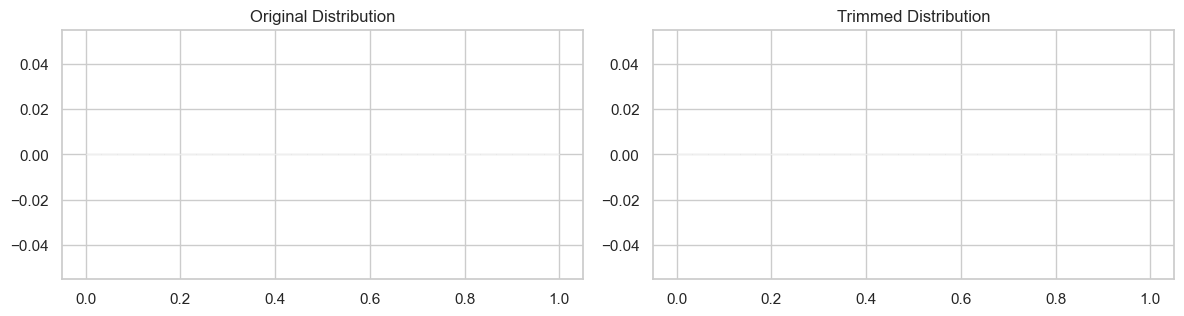

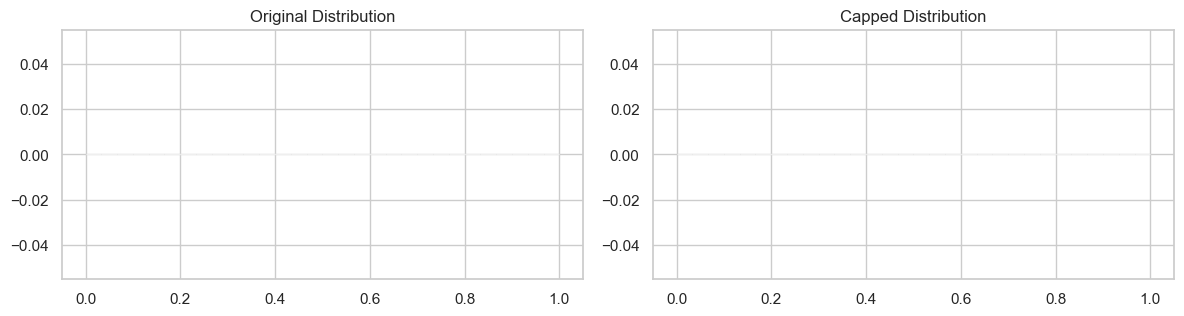

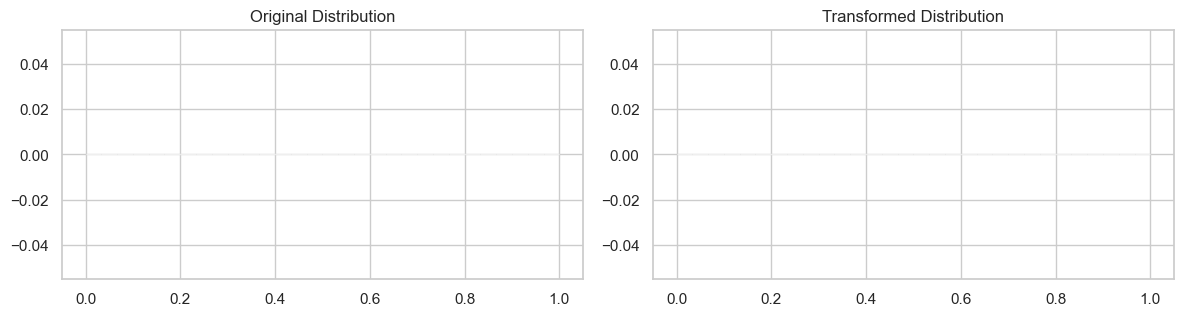

In [8]:
lower_limit = df['price'].quantile(0.05)  # Adjust the quantile as needed
upper_limit = df['price'].quantile(0.95)  # Adjust the quantile as needed

# Trim the DataFrame
trimmed_df = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(df['price'], bins=30, color='blue', alpha=0.7)
plt.title('Original Distribution')

plt.subplot(2, 2, 2)
plt.hist(trimmed_df['price'], bins=30, color='green', alpha=0.7)
plt.title('Trimmed Distribution')

plt.tight_layout()
plt.show()

# Cap the values
df['price_capped'] = df['price'].clip(lower=lower_limit, upper=upper_limit)

# Plot the original distribution
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(df['price'], bins=30, color='blue', alpha=0.7)
plt.title('Original Distribution')

# Plot the capped distribution
plt.subplot(2, 2, 2)
plt.hist(df['price_capped'], bins=30, color='orange', alpha=0.7)
plt.title('Capped Distribution')

plt.tight_layout()
plt.show()

# Add a small constant to avoid taking the log of zero
df['price_transformed'] = np.log1p(df['price'])

# Plot the original distribution
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(df['price'], bins=30, color='blue', alpha=0.7)
plt.title('Original Distribution')

# Plot the transformed distribution
plt.subplot(2, 2, 2)
plt.hist(df['price_transformed'], bins=30, color='purple', alpha=0.7)
plt.title('Transformed Distribution')

plt.tight_layout()
plt.show()

In [9]:
df = pd.read_csv('winequalityN.csv')

fixed_acidity = df['fixed acidity']
Q1 = fixed_acidity.quantile(0.25)
Q3 = fixed_acidity.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

fixed_acidity_outliers = fixed_acidity[(fixed_acidity < lower_bound) | (fixed_acidity > upper_bound)]

residual_sugar = df['residual sugar']
Q1 = residual_sugar.quantile(0.25)
Q3 = residual_sugar.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

residual_sugar_outliers = residual_sugar[(residual_sugar < lower_bound) | (residual_sugar > upper_bound)]

alcohol = df['alcohol']
Q1 = alcohol.quantile(0.25)
Q3 = alcohol.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

alcohol_outliers = alcohol[(alcohol < lower_bound) | (alcohol > upper_bound)]

print("\nAlcohol Outliers:")
print(alcohol_outliers)

print("\nResidual Sugar Outliers:")
print(residual_sugar_outliers)

print("\nFixed Acidity Outliers:")
print(fixed_acidity_outliers)



Alcohol Outliers:
3918    14.20
4503    14.05
5550    14.90
Name: alcohol, dtype: float64

Residual Sugar Outliers:
0       20.70
7       20.70
14      19.25
38      17.95
39      17.95
        ...  
4691    19.25
4694    19.25
4748    18.35
4749    18.40
4778    19.40
Name: residual sugar, Length: 118, dtype: float64

Fixed Acidity Outliers:
98       9.8
169      9.8
207     10.2
358     10.0
873     10.3
        ... 
6368    10.0
6372     9.9
6374     9.9
6441    11.1
6446    11.2
Name: fixed acidity, Length: 357, dtype: float64


In [10]:
# Define the features
features = ['fixed acidity', 'residual sugar', 'alcohol']

# Calculate means and standard deviations without outliers
means_no_outliers = df[features].mean()
stds_no_outliers = df[features].std()

# Z-score to identify and remove outliers
z_scores = zscore(df[features])
outliers = (z_scores < -3) | (z_scores > 3)

# Remove outliers
df_no_outliers = df[~outliers.any(axis=1)]

# Calculate means and standard deviations with outliers removed
means_with_outliers_removed = df_no_outliers[features].mean()
stds_with_outliers_removed = df_no_outliers[features].std()

print("Means without Outliers:")
print(means_no_outliers)
print("\nStandard Deviations without Outliers:")
print(stds_no_outliers)

print("\nMeans with Outliers Removed:")
print(means_with_outliers_removed)
print("\nStandard Deviations with Outliers Removed:")
print(stds_with_outliers_removed)


Means without Outliers:
fixed acidity      7.216579
residual sugar     5.444326
alcohol           10.491801
dtype: float64

Standard Deviations without Outliers:
fixed acidity     1.296750
residual sugar    4.758125
alcohol           1.192712
dtype: float64

Means with Outliers Removed:
fixed acidity      7.215366
residual sugar     5.444602
alcohol           10.490551
dtype: float64

Standard Deviations with Outliers Removed:
fixed acidity     1.292419
residual sugar    4.758550
alcohol           1.190751
dtype: float64
